## Importing Libraries:

In [1]:
# Standard Data-sci packages:
import pandas as pd
import numpy as np

# Scikit-Learn:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import svm
from sklearn import tree

# Keras:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, LabelBinarizer

# Sampling:
from imblearn.over_sampling import SMOTE, ADASYN

# XGBoost:
import xgboost as xgb

# Plots and Graphs:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import plotly.express as px
import scikitplot as skplt 
%matplotlib inline

# Other:
import warnings
warnings.filterwarnings('ignore')
# So we can see all columns:
pd.set_option('display.max_columns', None)

Using TensorFlow backend.
/Users/Thomas/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Importing Data:

In [2]:
df = pd.read_csv('180_408_bundle_archive.zip')
display(df.head())
df.info()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

# Data Cleaning:

In [3]:
# No reason to keep this. . . 
df['Unnamed: 32'].unique()

array([nan])

In [4]:
df = df.drop('Unnamed: 32', axis = 1)

Looks good so far.  Let's move on.

# EDA:

In [5]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
df_eda = df.drop(['id'], axis = 1) 

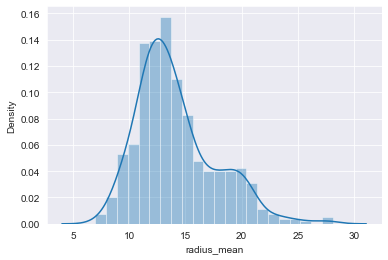

In [7]:
sns.distplot(df_eda.radius_mean)

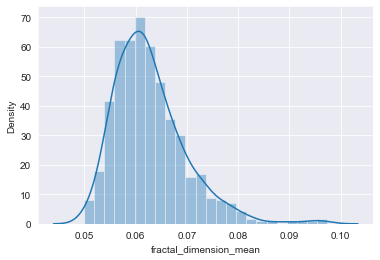

In [8]:
sns.distplot(df_eda.fractal_dimension_mean)

# Feature Engineering:

# X and y:

In [9]:
X = df.drop(['id', 'diagnosis'], axis = 1)
y = df['diagnosis']

# Train Test Split:

## Regular Split:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state = 123)
print(len(X_train), len(X_test), len(y_train), len(y_test))

426 143 426 143


## SMOTE:

In [11]:
X_train_resampled, y_train_resampled = SMOTE().fit_sample(X_train, y_train) 

# Preview resampled sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts())



B    268
M    268
dtype: int64


# Accuracy Metrics:

In [12]:
def show_accuracy(model):    
    training_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    training_accuracy = accuracy_score(y_train, training_preds)
    val_accuracy = accuracy_score(y_test, val_preds)
    print("Training Accuracy:  ", training_accuracy)
    print("Testing Accuracy:  ", val_accuracy)

# Baseline Model:

In [13]:
rf = RandomForestClassifier(n_estimators = 100, 
                            max_depth = 6, 
                            random_state = 123)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [14]:
show_accuracy(rf)

Training Accuracy:   1.0
Testing Accuracy:   0.993006993006993


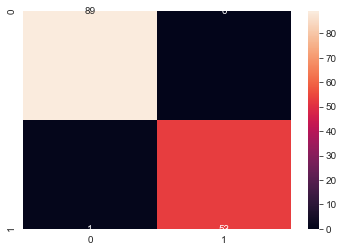

In [15]:
cm = confusion_matrix(y_test, rf.predict(X_test))
#sns.heatmap(cm,annot=True, fmt="d")
cm

# Improved Models:

# Neural Network:

## Scaling the Data:

In [16]:
scaler = StandardScaler()
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

In [17]:
binarizer = LabelBinarizer()
labels_train = binarizer.fit_transform(y_train)
labels_test = binarizer.transform(y_test)

## Accuracy Metrics:

In [18]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

## Model Building:

In [49]:
model_2 = Sequential()
model_2.add(Dense(10, activation='tanh', input_shape=(30,)))
model_2.add(Dense(15, activation='tanh'))
model_2.add(Dense(15, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))

In [50]:
model_2.compile(loss='binary_crossentropy', 
                optimizer='sgd', 
                metrics=['accuracy'])

In [51]:
results_2 = model_2.fit(scaled_data_train, labels_train, 
                        epochs=50, 
                        batch_size=10, 
                        validation_split=0.2)

Train on 340 samples, validate on 86 samples
Epoch 1/50
340/340 [==============================] - 0s 963us/step - loss: 0.5416 - acc: 0.7647 - val_loss: 0.4627 - val_acc: 0.8721
Epoch 2/50
340/340 [==============================] - 0s 173us/step - loss: 0.3737 - acc: 0.9176 - val_loss: 0.3485 - val_acc: 0.9419
Epoch 3/50
340/340 [==============================] - 0s 172us/step - loss: 0.2869 - acc: 0.9265 - val_loss: 0.2839 - val_acc: 0.9419
Epoch 4/50
340/340 [==============================] - 0s 169us/step - loss: 0.2333 - acc: 0.9471 - val_loss: 0.2436 - val_acc: 0.9302
Epoch 5/50
340/340 [==============================] - 0s 172us/step - loss: 0.1977 - acc: 0.9471 - val_loss: 0.2168 - val_acc: 0.9302
Epoch 6/50
340/340 [==============================] - 0s 186us/step - loss: 0.1726 - acc: 0.9529 - val_loss: 0.1980 - val_acc: 0.9419
Epoch 7/50
340/340 [==============================] - 0s 172us/step - loss: 0.1536 - acc: 0.9559 - val_loss: 0.1839 - val_acc: 0.9419
Epoch 8/50
340/34

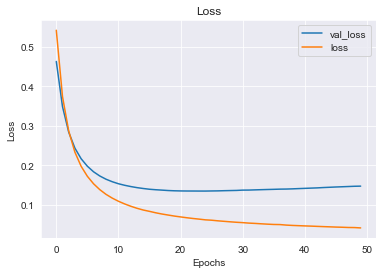

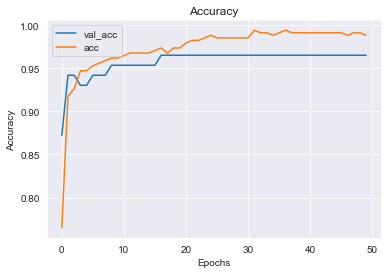

In [52]:
visualize_training_results(results_2)

In [53]:
results_train = model_2.evaluate(scaled_data_train, labels_train)
# Loss and Accuracy
print(results_train)

426/426 [==============================] - 0s 27us/step
[0.06202416569256867, 0.9859154929577465]


In [54]:
results_test = model_2.evaluate(scaled_data_test, labels_test)
# Loss and Accuracy
print(results_test)

143/143 [==============================] - 0s 50us/step
[0.06545451960454766, 0.9790209790209791]


# Final Model Evaluation:

# Conclusion: 